In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1wlJDjOjW-Kok_oP7M5KKlgKwcwo1mtzY'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('SMSSpamCollection.D2')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
dataset = pd.read_csv("SMSSpamCollection.D2",sep = "\t", names = ["target","text"])
dataset

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.drop_duplicates(inplace = True)
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [5]:
dataset.shape

(5169, 2)

In [6]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def process_text(text):
    cont = []
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return nopunc

In [0]:
processed = dataset['text'].apply(process_text)

In [9]:

list_data = []
for d in processed:
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = pattern.sub('', d)
  tmp = []
  for i in text:
    if not i.isdigit():
      tmp.append(i)
  joint = [''.join(tmp)]   
  f = []
  sop =[n.split() for n in joint]
  
  for job in sop[0]:
    if len(job)>3:
      f.append(job)
 
  joint = ' '.join(f)
  
  
  #new_joint = "".join(temp)


  list_data.append(joint) 
list_data

['jurong point crazy Available bugis great world buffet Cine amore',
 'Joking',
 'Free entry wkly comp final tkts Text receive entry questionstd rateTCs apply overs',
 'early already',
 'dont think goes lives around though',
 'FreeMsg darling weeks word back like still chgs send',
 'Even brother like speak They treat like aids patent',
 'request Melle Melle Minnaminunginte Nurungu Vettam callertune Callers Press copy friends Callertune',
 'WINNER valued network customer selected receivea prize reward claim call Claim code Valid hours',
 'mobile months entitled Update latest colour mobiles camera Free Call Mobile Update FREE',
 'gonna home soon dont want talk stuff anymore tonight cried enough today',
 'chances CASH From pounds send Cost pday days TsandCs apply Reply info',
 'URGENT week FREE membership Prize Jackpot word CLAIM wwwdbuknet LCCLTD POBOX LDNWARW',
 'searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times',
 'HAVE DATE SUN

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=0., max_df=1.0)
messages_bow = vect.fit_transform(list_data[:5169])
main_data = pd.DataFrame(messages_bow.A, columns=vect.get_feature_names())

In [11]:

print(main_data.head())

   aaniye  aaooooright  aathilove  aathiwhere  ...  zoom  zouk  zyada  〨ud
0       0            0          0           0  ...     0     0      0    0
1       0            0          0           0  ...     0     0      0    0
2       0            0          0           0  ...     0     0      0    0
3       0            0          0           0  ...     0     0      0    0
4       0            0          0           0  ...     0     0      0    0

[5 rows x 7595 columns]


In [12]:
filer = []
for i in dataset["target"]:
  if i == "ham":
    filer.append(0)
  elif i == "spam":
    filer.append(1)

len(filer)

5169

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_data, filer, test_size = 0.20, random_state = 0)
print(X_train.shape)
print(len(y_train))

(4135, 7595)
4135


In [0]:
def Accuracy(test,pred):
    count = 0
    for x,j in zip(test,pred):
        if x == j:
            count += 1
    accuracy = (count/float(len(test)))*100
    return accuracy

In [0]:
from sklearn.svm import SVC
svm = SVC(kernel ='linear', random_state = 0)

In [16]:
from sklearn.model_selection import GridSearchCV
c=[np.arange(0, 10, 1)]
g = [np.arange(0.0, 1, 0.1)]
parameters = [
    {'C':c[0]}, 
]
grid_search = GridSearchCV(estimator = svm ,param_grid =parameters, scoring ='accuracy',cv= 5, n_jobs =-1  )
grid_search = grid_search.fit(X_train,y_train)
best_result = grid_search.best_score_
print('best_result {}'.format(best_result))
best_parameters = grid_search.best_params_
print('best_parameters {}'.format(best_parameters))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best_result 0.9731559854897218
best_parameters {'C': 1}


In [17]:
param_learnt = grid_search.cv_results_["params"]
accuracy = grid_search.cv_results_['mean_test_score']
cc = []
for i in param_learnt:
  cc.append(i["C"])
score_table = pd.DataFrame({'C':cc, "accuracy":accuracy })
score_table

,C,accuracy
0,0,NaN
1,1,0.973156
2,2,0.970254
3,3,0.969770
4,4,0.969770
5,5,0.970254
6,6,0.969528
7,7,0.969528
8,8,0.970254
9,9,0.970254


Text(0.5, 0, "Value of 'C'")

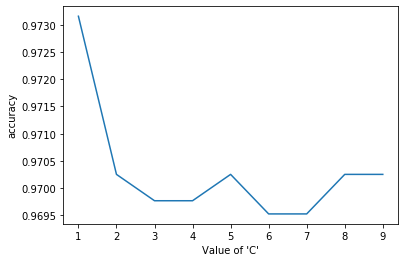

In [18]:
plt.plot(cc,accuracy)
plt.ylabel("accuracy")
plt.xlabel("Value of 'C'")

In [18]:
svm = SVC(C =1 ,kernel = 'linear', random_state = 0)
svm.fit(X_train,y_train)
# Predicting the Test set results
y_pred = svm.predict(X_test)
svm_model_pred_test_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred })
acc = Accuracy(y_test,y_pred)
print("The Accuracy of the model onn test set is :", acc)
print(svm_model_pred_test_df.head(20))

The Accuracy of the model onn test set is : 97.1953578336557
    Expected  Predicted
0          0          0
1          0          0
2          0          0
3          0          0
4          0          0
5          0          0
6          0          0
7          0          0
8          1          1
9          1          1
10         1          1
11         0          0
12         0          0
13         0          0
14         0          0
15         0          0
16         1          1
17         0          0
18         0          0
19         0          0


In [19]:
from sklearn.model_selection import GridSearchCV
svm = SVC(kernel ='rbf', random_state = 0)
parameters = [
    {'C':c[0]}, 
]
grid_search = GridSearchCV(estimator = svm ,param_grid =parameters, scoring ='accuracy',cv= 5, n_jobs =-1  )
grid_search = grid_search.fit(X_train,y_train)
best_result = grid_search.best_score_
print('best_result {}'.format(best_result))
best_parameters = grid_search.best_params_
print('best_parameters {}'.format(best_parameters))

best_result 0.9629987908101573
best_parameters {'C': 7}


In [20]:
param_learnt = grid_search.cv_results_["params"]
accuracy = grid_search.cv_results_['mean_test_score']
cc = []
for i in param_learnt:
  cc.append(i["C"])
score_table = pd.DataFrame({'C':cc, "accuracy":accuracy })
score_table

,C,accuracy
0,0,NaN
1,1,0.958888
2,2,0.962757
3,3,0.962273
4,4,0.962515
5,5,0.962757
6,6,0.962515
7,7,0.962999
8,8,0.962757
9,9,0.962757


Text(0.5, 0, "Value of 'C'")

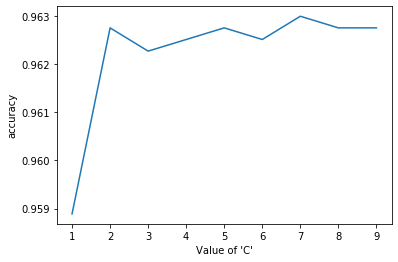

In [21]:
plt.plot(cc,accuracy)
plt.ylabel("accuracy")
plt.xlabel("Value of 'C'")

In [235]:
svm = SVC(C =1 ,kernel = 'linear', random_state = 0)
svm.fit(X_train,y_train)
# Predicting the Test set results
y_pred = svm.predict(X_test)
svm_model_pred_test_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred })
acc = Accuracy(y_test,y_pred)
print("The Accuracy of the model onn test set is :", acc)
print(svm_model_pred_test_df.head(20))

The Accuracy of the model onn test set is : 96.61508704061895
    Expected  Predicted
0          0          0
1          0          0
2          0          0
3          0          0
4          0          0
5          0          0
6          0          0
7          0          0
8          1          1
9          1          0
10         1          1
11         0          0
12         0          0
13         0          0
14         0          0
15         0          0
16         1          1
17         0          0
18         0          0
19         0          0


In [16]:
[np.arange(0.0, 1, 0.1)]

[array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])]